In [1]:
import numpy as np

In [11]:
from sklearn.datasets import make_regression
X,y =make_regression(n_samples=100, n_features=3)
print(X.shape ,y.shape)
y=y.reshape((-1,1))

(100, 3) (100,)


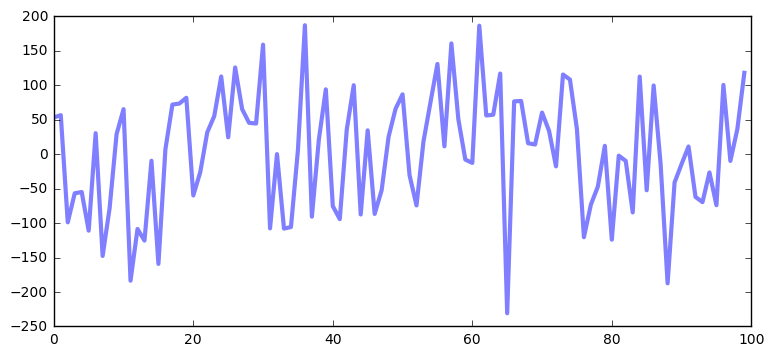

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(9,4))
plt.plot(y,alpha=0.5,linewidth=3)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


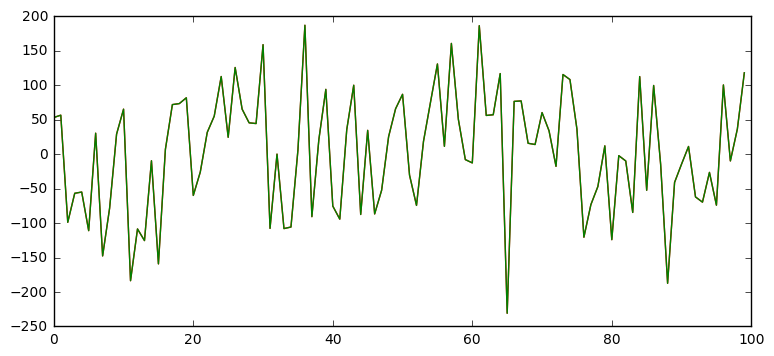

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
y_pred_sk = model.predict(X)
plt.figure(figsize=(9,4))
plt.plot(y ,color='R')
plt.plot(y_pred_sk,color='G')
plt.legend()

In [18]:
def gd(X, y, theta, l_rate, iterations): 
    cost_history = [0] * iterations
    m = X.shape[0]
    for epoch in range(iterations):
        y_hat = X.dot(theta)
        loss = y_hat - y
        gradient = X.T.dot(loss)/m
        theta = theta - l_rate * gradient
        cost = np.dot(loss.T,loss)
        cost_history[epoch] = cost[0,0]
    return theta, cost_history

In [19]:
def sgd(X,y,theta, l_rate,iterations):
    cost_history =[0] * iterations
    for epoch in range(iterations):
        for i,row in enumerate(X):
            yhat = np.dot(row,theta)
            loss = yhat[0] - y[i]          
            theta = theta - l_rate  * loss * row.reshape((-1,1))
            cost_history[epoch] += loss ** 2
    return theta,cost_history

In [20]:
def predict(X,theta):
    return np.dot(X,theta)

In [21]:
theta = np.random.rand(X.shape[1],1)
 
iterations = 100
l_rate =0.1

theta,cost_history = gd(X,y,theta,l_rate,iterations)
theta.T

array([[48.53342471, 82.29374403,  8.50840516]])

In [22]:
y_predict = predict(X,theta) 

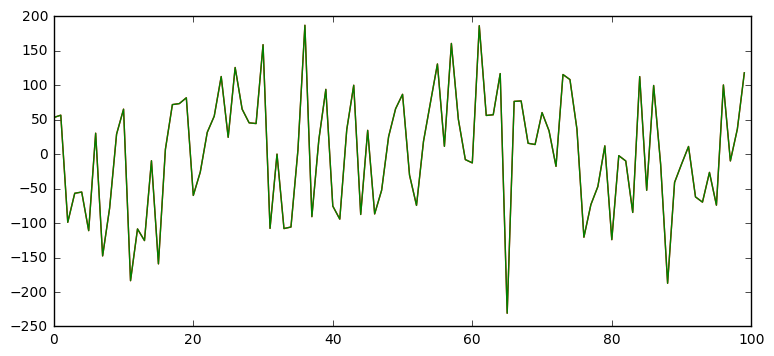

In [31]:
import seaborn as sns
y_predict = predict(X,theta)
plt.figure(figsize=(9,4))
plt.plot(y,color='R')
plt.plot(y_predict,color='G')

In [32]:
model.coef_

array([[48.54597102, 82.31351886,  8.52184984]])